<a href="https://colab.research.google.com/github/Abhi-gola/Fruit-classifier/blob/main/lion_tiger_leopard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+https://github.com/Joeclinton1/google-images-download.git

  Cloning https://github.com/Joeclinton1/google-images-download.git to /tmp/pip-req-build-pobkv9fy
  Running command git clone -q https://github.com/Joeclinton1/google-images-download.git /tmp/pip-req-build-pobkv9fy
     |████████████████████████████████| 954 kB 4.2 MB/s 
     |████████████████████████████████| 138 kB 51.2 MB/s 
     |████████████████████████████████| 356 kB 43.7 MB/s 
     |████████████████████████████████| 55 kB 3.3 MB/s 
     |████████████████████████████████| 3.5 MB 25.6 MB/s 
     |████████████████████████████████| 54 kB 3.0 MB/s 
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=15969 sha256=6279d3deee4834d40f824811bbf81d83bed1155b5fa67e1ccf43e81efc3761a5
  Stored in directory: /tmp/pip-ephem-wheel-cache-uhuuit8u/wheels/79/5c/d2/2569a4f55ff29b3c4d6b1114d5110a70a79afbf381e6eb3e87
Successfully built google-images-download
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uni

In [ ]:
from google_images_download import google_images_download

#instantiate the class
response = google_images_download.googleimagesdownload()
arguments = {"keywords":"lion, tiger, leopard",
             "limit":100,"print_urls":False}
paths = response.download(arguments)


Item no.: 1 --> Item name = lion
Evaluating...
Starting Download...
Completed Image ====> 1.lion_waiting_in_namibia.jpg
Completed Image ====> 2.lion-kenya-masai-mara-national-reserve.jpg
Completed Image ====> 3.african-lion_thumb_16x9.jpg.webp
Completed Image ====> 4.african-lion_2x3.jpg.webp
Completed Image ====> 5.lion-sitting-looking-away-panthera-leo-10-years-old-isolated-picture-id455663609.jpg
Completed Image ====> 6.cecil_the_lion_at_hwange_national_park_%284516560206%29.jpg
Completed Image ====> 7.j9keykezf4hhd5lrgf799n.jpg
Completed Image ====> 8.lion.jpg
Completed Image ====> 9.6c8af58660f43af09ddcbd6d2368b85e.jpg
Completed Image ====> 10.2wafu1bmcz_b21fc8e6.jpeg
Invalid image format 'text/plain'. Skipping...
Completed Image ====> 11.tlk-print-use-013_dp_0040_comp_v0703_right_srgb.1145%20(1).jpg
Completed Image ====> 12.lion_d%27afrique.jpg
Completed Image ====> 13.1628511415_lion.jpg
Completed Image ====> 14.1707px-lion_%28panthera_leo%29_male_6y.jpg
Completed Image ====> 1

In [ ]:
import os
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!pip install split-folders

In [ ]:
!mkdir wildcats_val

In [ ]:
import splitfolders
input_folder = '/content/downloads'

splitfolders.ratio(input_folder, output='wildcats_val',
                   ratio=(.8, .2),
                   group_prefix=None)



Copying files: 0 files [00:00, ? files/s]
Copying files: 91 files [00:00, 892.70 files/s]
Copying files: 181 files [00:00, 732.01 files/s]
Copying files: 289 files [00:00, 569.03 files/s]


In [ ]:
import cv2
import numpy as np
sdir= r'/content/wildcats_val/train' 
ext='jpg' 
prefix='aug' 
batch_size=32 
passes=50 
datagen = ImageDataGenerator( rotation_range=45, width_shift_range=0.2, height_shift_range=0.2, shear_range = 0.2,
                                zoom_range = 0.2,  horizontal_flip=True, fill_mode = 'reflect')
data=datagen.flow_from_directory(directory = sdir, batch_size = batch_size,  target_size = (256, 256),
                                 color_mode = 'rgb', shuffle=True)
for i in range (passes):
    images, labels=next(data)
    class_dict=data.class_indices
    new_dict={}
    # make a new dictionary with keys and values reversed
    for key, value in class_dict.items(): # dictionary is now {numeric class label: string of class_name}
        new_dict[value]=key    
    for j in range (len(labels)):                
        class_name = new_dict[np.argmax(labels[j])]         
        dir_path=os.path.join(sdir,class_name )         
        new_file=prefix + '-' +str(i*batch_size +j) + '.'  + ext       
        img_path=os.path.join(dir_path, new_file)        
        img=cv2.cvtColor(images[j], cv2.COLOR_BGR2RGB)
        cv2.imwrite(img_path, img)
print ('*** process complete')  

Found 214 images belonging to 3 classes.
*** process complete


In [ ]:
rm -rf `find -type d -name .ipynb_checkpoints`

In [ ]:
train = ImageDataGenerator(rescale=1./255)
val = ImageDataGenerator(rescale=1./255)

In [ ]:
train_data = train.flow_from_directory('/content/wildcats_val/train', target_size=(200,200),
                                       batch_size=20, shuffle=True,
                                       class_mode="categorical")
val_data = val.flow_from_directory('/content/wildcats_val/val', target_size=(200,200),
                                       batch_size=20, shuffle=True,
                                       class_mode="categorical")

Found 1744 images belonging to 3 classes.
Found 56 images belonging to 3 classes.


In [ ]:
train_data.class_indices

{' leopard': 0, ' tiger': 1, 'lion': 2}

In [ ]:

model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, (3,3), padding='same', 
                                                           kernel_regularizer=regularizers.l2(1e-2), 
                                                           activation='relu',input_shape=(200,200,3)),
                                     
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3), padding = 'same',
                                                           kernel_regularizer=regularizers.l2(1e-2),
                                                           activation='relu'),
                                     
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(128,(3,3), padding='same',
                                                           kernel_regularizer=regularizers.l2(1e-2),
                                                           activation='relu'),
                                     
                                    tf.keras.layers.MaxPool2D(2,2),  
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu', 
                                                          kernel_regularizer=regularizers.l2(1e-3)),
                                    tf.keras.layers.Dropout(0.4), 
                                    tf.keras.layers.Dense(3, activation='softmax')                                 
])

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer = ('adam'),
              metrics = ['acc'])

In [ ]:
model_fit = model.fit(train_data, 
                      steps_per_epoch = 30,
                      epochs=40,
                      validation_data=val_data)

Epoch 1/40
30/30 [==============================] - 42s 366ms/step - loss: 3.2223 - acc: 0.3950 - val_loss: 2.0993 - val_acc: 0.5714
Epoch 2/40
30/30 [==============================] - 10s 331ms/step - loss: 1.9091 - acc: 0.5200 - val_loss: 1.6230 - val_acc: 0.6071
Epoch 3/40
30/30 [==============================] - 9s 288ms/step - loss: 1.6358 - acc: 0.5450 - val_loss: 1.4706 - val_acc: 0.6250
Epoch 4/40
30/30 [==============================] - 9s 293ms/step - loss: 1.4690 - acc: 0.5771 - val_loss: 1.4296 - val_acc: 0.6250
Epoch 5/40
30/30 [==============================] - 8s 274ms/step - loss: 1.3263 - acc: 0.6117 - val_loss: 1.3040 - val_acc: 0.6786
Epoch 6/40
30/30 [==============================] - 8s 276ms/step - loss: 1.2105 - acc: 0.6567 - val_loss: 1.1812 - val_acc: 0.6429
Epoch 7/40
30/30 [==============================] - 7s 238ms/step - loss: 1.1730 - acc: 0.6627 - val_loss: 1.1727 - val_acc: 0.6250
Epoch 8/40
30/30 [==============================] - 7s 249ms/step - loss: 

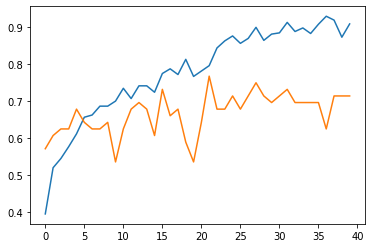

In [ ]:
acc = model_fit.history['acc']
val_acc = model_fit.history['val_acc']
loss = model_fit.history['loss']
val_loss = model_fit.history['val_loss']

epochs_range = range(40)

plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')

In [ ]:
!mkdir test

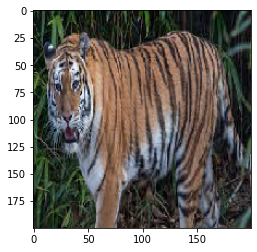

In [ ]:
img = image.load_img("/content/test/lion test.jpg", target_size=(200,200))
img1 = image.load_img("/content/test/leopard test.jpg", target_size=(200,200))
img2 = image.load_img("/content/test/tiger test.jpg", target_size=(200,200))
plt.imshow(img)
plt.imshow(img1)
plt.imshow(img2) 
plt.show()

In [ ]:
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

predict = model.predict(img_batch)

output = { 0:'leopard',1:'tiger',2:'lion'}

print("predicted: ", output[np.argmax(predict)])

predicted:  lion


In [ ]:
img_array1 = image.img_to_array(img1)
img_batch1 = np.expand_dims(img_array1, axis=0)

predict = model.predict(img_batch1)

output = { 0:'leopard',1:'tiger',2:'lion'}

print("predicted: ", output[np.argmax(predict)])

predicted:  leopard


In [ ]:
img_array2 = image.img_to_array(img2)
img_batch2 = np.expand_dims(img_array2, axis=0)

predict = model.predict(img_batch2)

output = { 0:'leopard',1:'tiger',2:'lion'}

print("predicted: ", output[np.argmax(predict)])

predicted:  tiger
